# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import norm
from numpy.random import seed

In [2]:
path = '/Users/robertspoonmore/Desktop/Springboard information/case study project files/Frequentist Case Study/'
medical = pd.read_csv(path+'insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [5]:
zero_values = np.sum(medical['charges']<=0)
zero_values

0

In [6]:
has_values = np.sum(medical['charges']>0)
has_values

1338

__A:__
From the data the analysis, look at the charges column of the dataset. There are 1338 rows of data in this dataset.  A quick review of the data shows that there are no zero values or non values for the charges column.  We have good data with no missing values.  Now we will take the mean and standard deviation and plot them against the histogram of the values

In [7]:
charges = medical['charges']
charges_mean = charges.mean()
charges_mean

13270.422265141257

In [8]:
charges_std = charges.std()
charges_std

12110.011236693994

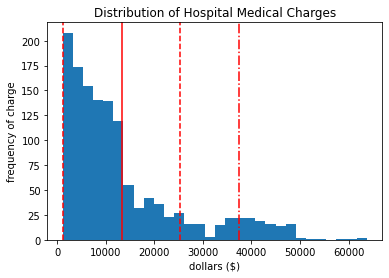

In [9]:
_ = plt.hist(charges, bins=30)
_ = plt.xlabel('dollars ($)')
_ = plt.ylabel('frequency of charge')
_ = plt.title('Distribution of Hospital Medical Charges')
_ = plt.axvline(charges_mean, color='r')
_ = plt.axvline(charges_mean+charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean-charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean+(2*charges_std), color='r', linestyle='-.')
# the lower limit (2std below mean) is below zero do not plot

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A2:__
Based on sample size, I would apply the T test to determine of the target of $12,000 is still within the 95% confidence interval of the charges.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A3:__
Since the concern is for charges to be at a minimum and there is no issue with them exceeding a value, only one tail is in question.  So, a ***one sided*** interval should be considered

In [10]:
n = len(charges)
df = n-1
crit_val = t(df).ppf(0.95)
charges.mean() - crit_val / np.sqrt(n) * charges.std()

12725.48718381623

In [11]:
with_Ins = medical[medical['insuranceclaim']==1]
with_Ins

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.92400,1
1,18,1,33.77,1,0,2,1725.55230,1
4,32,1,28.88,0,0,1,3866.85520,1
6,46,0,33.44,1,0,2,8240.58960,1
10,25,1,26.22,0,0,0,2721.32080,1
...,...,...,...,...,...,...,...,...
1330,57,0,25.74,2,0,2,12629.16560,1
1331,23,0,33.40,0,0,3,10795.93733,1
1334,18,0,31.92,0,0,0,2205.98080,1
1335,18,0,36.85,0,0,2,1629.83350,1


In [12]:
withOut_Ins = medical[medical['insuranceclaim']==0]
withOut_Ins

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
...,...,...,...,...,...,...,...,...
1324,31,1,25.935,1,0,1,4239.89265,0
1328,23,0,24.225,2,0,0,22395.74424,0
1332,52,0,44.700,3,0,3,11411.68500,0
1333,50,1,30.970,3,0,1,10600.54830,0


By splitting the dataframe into  those with insurance claims and those without we see that the total dataset of 1338 breaks into 783 records with insurance claims and 555 without. 

In [13]:
charge_In = with_Ins['charges']
charge_In.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

In [14]:
charge_NoIn = withOut_Ins['charges']
charge_NoIn.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

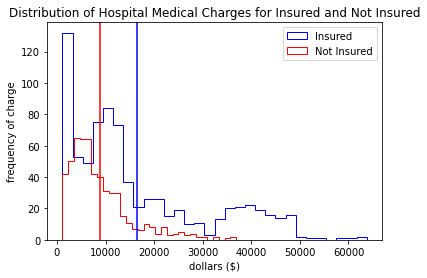

In [15]:
_ = plt.hist(charge_In, bins=30,label='Insured',histtype='step',color='b')
_ = plt.hist(charge_NoIn, bins=30,label='Not Insured',histtype='step',color='r')
_ = plt.xlabel('dollars ($)')
_ = plt.ylabel('frequency of charge')
_ = plt.title('Distribution of Hospital Medical Charges for Insured and Not Insured')
_ = plt.axvline(charge_In.mean(), color='b')
_ = plt.axvline(charge_NoIn.mean(), color='r')
_ = plt.legend()

An initial look at the data shows the profile of both insured and not insured data sets and their means.  Both data sets overlap, but there means appear to be very different.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A4:__
***The null hypothesis is that there is no difference between the charge rates of patients with or without insurance claims.***

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A5:__ 
First the manual calculation using the equations.  Then apply the scipy.stats t-test

In [16]:
n0 = len(charge_In)
mean0 = charge_In.mean()
std0 = charge_In.std()
n1 = len(charge_NoIn)
mean1 = charge_NoIn.mean()
std1 = charge_NoIn.std()

In [17]:
std_pool = np.sqrt(((n0-1)*std0**2 + (n1-1)*std1**2)/(n0+n1-2))
std_pool

11520.034268775256

In [18]:
t_stat_calc = (mean0-mean1)/(std_pool*np.sqrt(1/n0 + 1/n1))
t_stat_calc

11.89329903087671

In [19]:
p_value_calc = (1-t(n0+n1-1).cdf(t_stat_calc))*2
p_value_calc

0.0

Using scipy.stats take the t-test value to determine mean differences between samples

In [20]:
ttest_ind(charge_NoIn, charge_In, equal_var=False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

To reflect on the original question, "What is the probability of the average claims falling below $12,000.  We need to look at the data separately between insured and not insured.  In reviewing the data it does not appear to have the shape of normality, so we can't assume normal distribution.

Insured descriptive statistics:
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000

The mean is $4,423 above the limit of $12,000.

Not insured descriptive statistics:
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
The mean is below $12,000, and in fact at least 75% of the charges were below $12,000

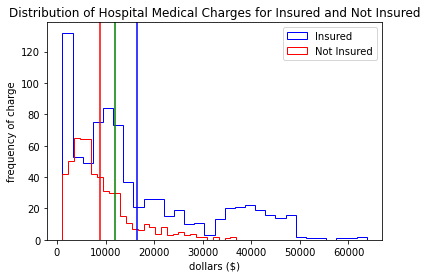

In [21]:
_ = plt.hist(charge_In, bins=30,label='Insured',histtype='step',color='b')
_ = plt.hist(charge_NoIn, bins=30,label='Not Insured',histtype='step',color='r')
_ = plt.xlabel('dollars ($)')
_ = plt.ylabel('frequency of charge')
_ = plt.title('Distribution of Hospital Medical Charges for Insured and Not Insured')
_ = plt.axvline(charge_In.mean(), color='b')
_ = plt.axvline(charge_NoIn.mean(), color='r')
_ = plt.axvline(12000, color='g')
_ = plt.legend()

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A6:__
Running both analysis, the calculated and the scipy stats T test yielded a similar result of a p value extremely close to 0 (much below the threshold of 0.05).  In addition the overlaying of both data sets illustrates the differences of the data concentration.  Given these results, we can reject the null hypothesis that the means are the same.  The mean values of the claims of the not insured is different than the mean value of the claims of the insured.

See the above histogram showing the different populations.  The green line is the target for $12,000.  Clearly the blue data (insured) averages above the target and the red data (not insured) falls below.

To respond to the original question.  It apears that the mean of the current charges for insured claims falls above $12,000.

However, the distinctly different charges for the uninsured claims falls below the $12,000 limit.  In fact, the mean charges for all non insured is $8,821.  It is also clear that over 75% of all claims fall below the $12,000 limit.  Further investigation is needed as to the average charges for non insured

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test